In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [3]:
raw_data = np.genfromtxt('meanfac6 .csv',delimiter = ',')
raw_data

array([[ 1.46400000e+01, -5.81175390e+00,  6.36685342e-01,
         6.19221604e+00, -1.15071381e+01,  1.00000000e+00],
       [ 1.46000000e+01, -5.78342895e+00,  7.31903182e-01,
         6.21419775e+00, -1.17001451e+01,  9.99903973e-01],
       [ 1.47700000e+01, -5.43087604e+00,  4.68770338e-01,
         6.19965281e+00, -1.19755612e+01,  9.99819949e-01],
       ...,
       [-1.23300000e+01,  2.87980737e+01,  5.01755314e+00,
         7.37128378e-01,  1.71325347e+01,  2.52618250e-02],
       [-1.19500000e+01,  2.71486407e+01,  4.41601929e+00,
         5.57340390e-01,  1.71083923e+01,  1.91760840e-02],
       [-1.21900000e+01,  2.88853817e+01,  4.79346515e+00,
        -2.45112209e-01,  1.84495653e+01,  1.30138220e-02]])

In [4]:
A,B,C,D,E,F = [],[],[],[],[],[]

In [28]:
for i in range(len(raw_data)):
    A.append(raw_data[i][0])
    B.append(raw_data[i][1])
    C.append(raw_data[i][2])
    D.append(raw_data[i][3])
    E.append(raw_data[i][4])
    F.append(raw_data[i][5])

In [16]:
X

array([[ 14.64],
       [ 14.6 ],
       [ 14.77],
       ...,
       [-12.33],
       [-11.95],
       [-12.19]])

In [7]:
X = np.array(A).reshape(-1,1)
y = np.array(F).reshape(-1,1)

In [148]:
_ = []
__ = []
for i in range(len(A)):
    _.append(int(A[i]))
    __.append(int(F[i]))
A = _
F = __

In [8]:
F

[1.0,
 0.999903973,
 0.999819949,
 0.999717919,
 0.999636896,
 0.999566876,
 0.999522864,
 0.998435553,
 0.99842555,
 0.998405544,
 0.998375535,
 0.998345527,
 0.998315518,
 0.99828551,
 0.996324949,
 0.996304943,
 0.996274935,
 0.996244926,
 0.99622492,
 0.996204915,
 0.9961549,
 0.996104886,
 0.996054872,
 0.996004857,
 0.995994855,
 0.99594484,
 0.995934837,
 0.995844812,
 0.995724777,
 0.995574734,
 0.995424691,
 0.995274649,
 0.993734208,
 0.993664188,
 0.993584165,
 0.993504142,
 0.993424119,
 0.993344096,
 0.993144039,
 0.992013716,
 0.991863673,
 0.991833664,
 0.991803656,
 0.991763644,
 0.991743639,
 0.991733636,
 0.991703627,
 0.99164361,
 0.99143355,
 0.991093453,
 0.990763358,
 0.990393252,
 0.99000074,
 0.989530906,
 0.989342452,
 0.989141394,
 0.988905827,
 0.988691366,
 0.988471803,
 0.988328762,
 0.988239036,
 0.988228933,
 0.988073189,
 0.987889937,
 0.987771003,
 0.987701983,
 0.98755384,
 0.987466515,
 0.987400597,
 0.987187536,
 0.987086807,
 0.986844037,
 0.9868422

In [9]:
num = len(X)
train_ratio = 0.8
num

1783

In [195]:
clf = LogisticRegression(random_state = 100,max_iter = 1000,).fit(X[:,:int(num*train_ratio)],y[:,:int(num*train_ratio)])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [196]:
y_pred = clf.predict(X[-int(num*(1-train_ratio)):,:])
# X[int(num*train_ratio):,:]
# X[:,:int(num*train_ratio)]

In [10]:
import statsmodels.api as sta

In [19]:
logit = sta.Logit(F, A)
results = logit.fit(maxiter = 1000)
print(results.summary())
print(np.exp(results.conf_int()))
print(np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.672464
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1783
Model:                          Logit   Df Residuals:                     1782
Method:                           MLE   Df Model:                            0
Date:                Tue, 29 Jan 2019   Pseudo R-squ.:                  -14.98
Time:                        01:11:56   Log-Likelihood:                -1199.0
converged:                       True   LL-Null:                       -75.050
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0561      0.008     -6.721      0.000      -0.073      -0.040


In [30]:
X_1 = []
for i in range(len(A)):
    X_1.append([A[i],B[i]])

In [31]:
logit = sta.Logit(F, X_1)
results = logit.fit(maxiter = 1000)
print(results.summary())
print(np.exp(results.conf_int()))
print(np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.664198
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3566
Model:                          Logit   Df Residuals:                     3564
Method:                           MLE   Df Model:                            1
Date:                Tue, 29 Jan 2019   Pseudo R-squ.:                  -14.78
Time:                        01:31:42   Log-Likelihood:                -2368.5
converged:                       True   LL-Null:                       -150.10
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0368      0.006     -6.264      0.000      -0.048      -0.025
x2             0.0302      0.

In [32]:
X_2 = []
for i in range(len(A)):
    X_2.append([A[i],B[i],C[i]])

In [33]:
logit = sta.Logit(F, X_2)
results = logit.fit(maxiter = 1000)
print(results.summary())
print(np.exp(results.conf_int()))
print(np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.601398
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3566
Model:                          Logit   Df Residuals:                     3563
Method:                           MLE   Df Model:                            2
Date:                Tue, 29 Jan 2019   Pseudo R-squ.:                  -13.29
Time:                        01:32:37   Log-Likelihood:                -2144.6
converged:                       True   LL-Null:                       -150.10
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1361      0.010    -13.346      0.000      -0.156      -0.116
x2             0.0095      0.

In [34]:
X_3 = []
for i in range(len(A)):
    X_3.append([A[i],B[i],C[i],D[i]])

In [35]:
logit = sta.Logit(F, X_3)
results = logit.fit(maxiter = 1000)
print(results.summary())
print(np.exp(results.conf_int()))
print(np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.600640
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3566
Model:                          Logit   Df Residuals:                     3562
Method:                           MLE   Df Model:                            3
Date:                Tue, 29 Jan 2019   Pseudo R-squ.:                  -13.27
Time:                        01:33:24   Log-Likelihood:                -2141.9
converged:                       True   LL-Null:                       -150.10
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1540      0.013    -11.966      0.000      -0.179      -0.129
x2             0.0044      0.

In [36]:
X_4 = []
for i in range(len(A)):
    X_4.append([A[i],B[i],C[i],D[i],E[i]])

In [37]:
logit = sta.Logit(F, X_4)
results = logit.fit(maxiter = 1000)
print(results.summary())
print(np.exp(results.conf_int()))
print(np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.567240
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3566
Model:                          Logit   Df Residuals:                     3561
Method:                           MLE   Df Model:                            4
Date:                Tue, 29 Jan 2019   Pseudo R-squ.:                  -12.48
Time:                        01:34:09   Log-Likelihood:                -2022.8
converged:                       True   LL-Null:                       -150.10
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1471      0.013    -11.569      0.000      -0.172      -0.122
x2             0.0395      0.

In [123]:
from sklearn.metrics import r2_score

In [193]:
r2_score(y_pred,y_true)

0.0

In [173]:
len(y_pred)

356

In [185]:
y_true = []
for i in range(len(y[-int(num*(1-train_ratio)):])):
    y_true.append(list(y[-int(num*(1-train_ratio)):][i])[0])


In [156]:
y[-int(num*train_ratio):][0]

array([837873432])

In [182]:
len(y_true)

356

In [190]:
y_true

[837669674,
 837609156,
 837437207,
 836831434,
 836722303,
 836661285,
 836557956,
 836406212,
 836226361,
 836216158,
 836002297,
 835577975,
 835575475,
 835478947,
 835257984,
 835182362,
 835083034,
 834810856,
 834803354,
 834650710,
 834575389,
 834510570,
 834376032,
 834238692,
 834045037,
 833442164,
 833441464,
 833407254,
 833128775,
 833033748,
 832557311,
 832388163,
 832364456,
 832302438,
 832221815,
 832090478,
 832086077,
 831988249,
 831909126,
 831858011,
 831783190,
 831763384,
 831316857,
 831308554,
 830620057,
 829966871,
 829599866,
 829558154,
 829420914,
 829163041,
 829126130,
 828956081,
 828213769,
 827966498,
 827896578,
 827515970,
 826951708,
 826907195,
 826824572,
 826746449,
 826625715,
 826383646,
 826380445,
 826255809,
 825958524,
 825947621,
 825755266,
 825695049,
 825605023,
 825572014,
 825519499,
 825458481,
 825336146,
 825324643,
 825299136,
 825295635,
 825286332,
 825273628,
 825127787,
 825120384,
 824977143,
 824915526,
 824902722,
 824

In [43]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sta
path = r'C:\Users\user\Documents\WeChat Files\THU-TZR-CE-MATHS\Files\coeanfactor22.csv'
raw_data = np.genfromtxt(path,delimiter = ',')

A,B,C,D,E,F = [],[],[],[],[],[]

for i in range(len(raw_data)):
    A.append(raw_data[i][0])
    B.append(raw_data[i][1])
    C.append(raw_data[i][2])
    D.append(raw_data[i][3])
    E.append(raw_data[i][4])
    F.append(raw_data[i][49])
F[0] = 1
X = np.array(D).reshape(-1,1)
y = np.array(F).reshape(-1,1)

logit = sta.Logit(F, D)
results = logit.fit(maxiter = 1000)
print(results.summary())
print(np.exp(results.conf_int()))
print(np.exp(results.params))

# X_1 = []
# for i in range(len(D)):
#     X_1.append([D[i],B[i]])

# logit = sta.Logit(F, X_1)
# results = logit.fit(maxiter = 1000)
# print(results.summary())
# print(np.exp(results.conf_int()))
# print(np.exp(results.params))

# X_2 = []
# for i in range(len(A)):
#     X_2.append([A[i],B[i],C[i]])

# logit = sta.Logit(F, X_2)
# results = logit.fit(maxiter = 1000)
# print(results.summary())
# print(np.exp(results.conf_int()))
# print(np.exp(results.params))

# X_3 = []
# for i in range(len(A)):
#     X_3.append([A[i],B[i],C[i],D[i]])

# logit = sta.Logit(F, X_3)
# results = logit.fit(maxiter = 1000)
# print(results.summary())
# print(np.exp(results.conf_int()))
# print(np.exp(results.params))

# X_4 = []
# for i in range(len(A)):
#     X_4.append([A[i],B[i],C[i],D[i],E[i]])

# logit = sta.Logit(F, X_4)
# results = logit.fit(maxiter = 1000)
# print(results.summary())
# print(np.exp(results.conf_int()))
# print(np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.560517
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                12494
Model:                          Logit   Df Residuals:                    12493
Method:                           MLE   Df Model:                            0
Date:                Tue, 29 Jan 2019   Pseudo R-squ.:                  -18.81
Time:                        01:42:30   Log-Likelihood:                -7003.1
converged:                       True   LL-Null:                       -353.45
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1806      0.004    -42.312      0.000      -0.189      -0.172
[[0.82783661 0.84180219]]
[0.

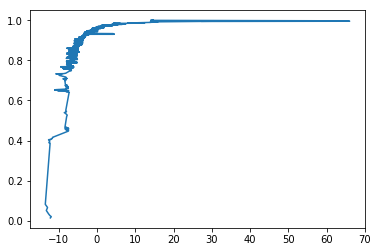

In [45]:
plt.plot(D,F)